# Project: The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, the movie database will be analysed. The dataset contains columns showing the budget and revenue of movies, the genres, release date, ratings etc. Investigating this dataset, a few questions will be answered:
- Which genres are most popular from year to year
- Genres of movies with high budgets
- What kinds of properties are associated with movies that have high revenues?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading the datasets
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


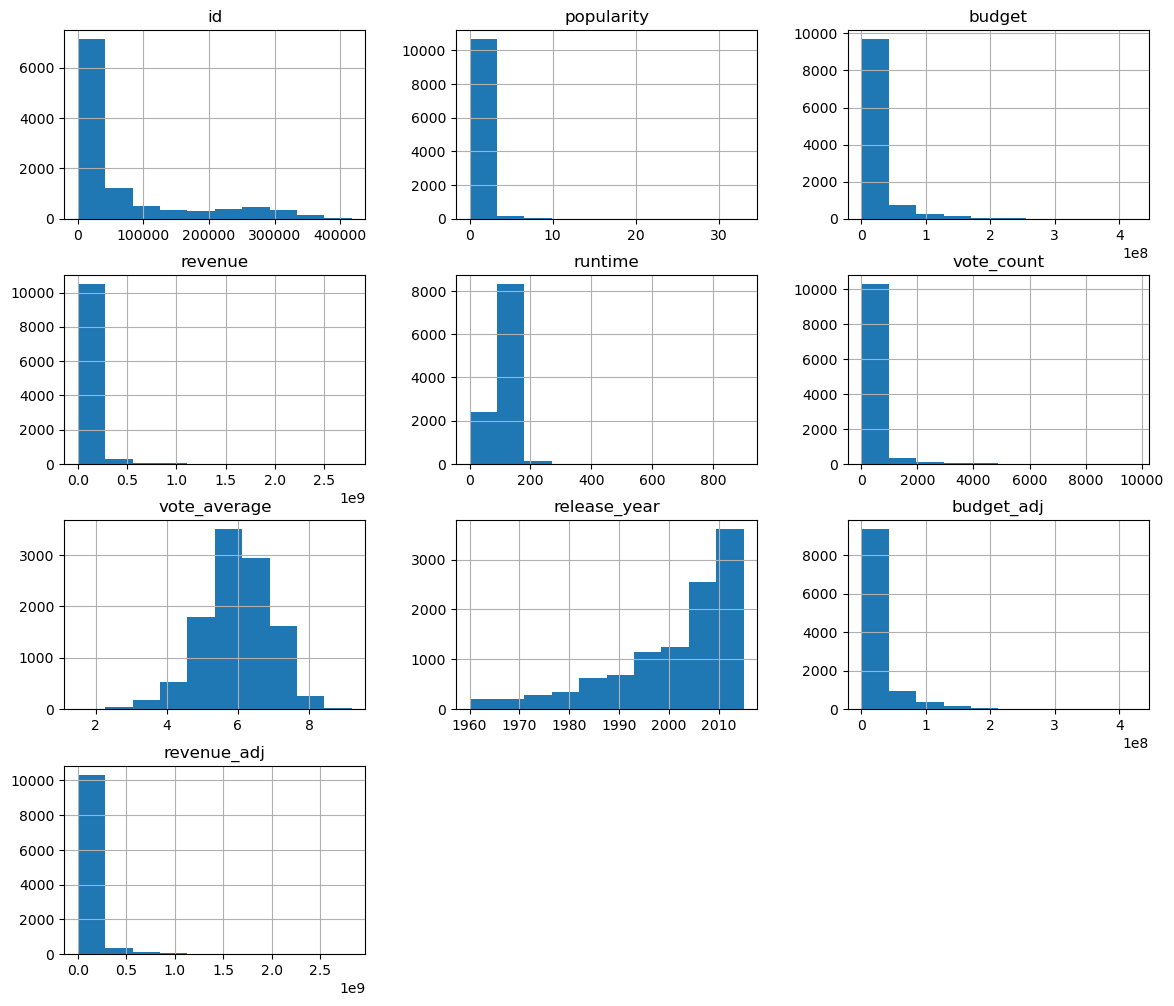

In [6]:
df.hist(figsize=(14,12));

The cell above shows the univariate analysis of the dataset, showing the summary statistics and distribution of independent columns. It can be observed that budget is skewed to the right and release year is skewed to the left.

In [7]:
df[df['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


### Data Cleaning

In [8]:
# dropping the columns I do not need for my analysis.
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [9]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

<a id='eda'></a>
## Exploratory Data Analysis

### (Question 1) Which genres are most popular from year to year?

In [11]:
# creating a copy of the data for easy manipulation to answer this question.
df_1 = df.copy()
df_1.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# dropping unneeded columns, duplicate rows and null samples.
df_1.drop(['production_companies', 'release_date', 'cast'], axis=1, inplace=True)
df_1.drop_duplicates(inplace=True)
df_1.dropna(inplace=True)

In [13]:
# Splitting the genre column
df_1['genres'] = df_1['genres'].str.split('|')
df_1 = df_1.explode('genres')

In [14]:
df_1.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
df_1.shape

(26864, 12)

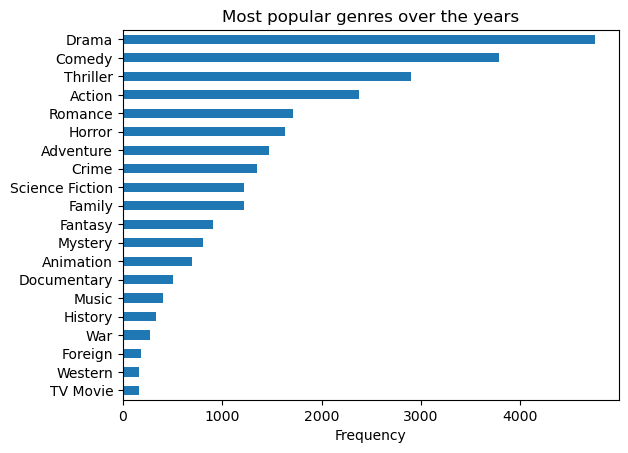

In [16]:
df_1['genres'].value_counts().sort_values().plot.barh()
plt.xlabel('Frequency')
plt.title('Most popular genres over the years');

In [17]:
# Returns the count of genres for each year in a sorted manner
df_gy = df_1[['genres', 'release_year']].value_counts().reset_index().sort_values(['release_year', 0, 'genres'])
df_gy

,genres,release_year,0
994,Foreign,1960,1
1043,Music,1960,1
960,Crime,1960,2
898,Fantasy,1960,2
905,War,1960,2
...,...,...,...
44,Action,2015,107
33,Horror,2015,125
21,Comedy,2015,160
18,Thriller,2015,171


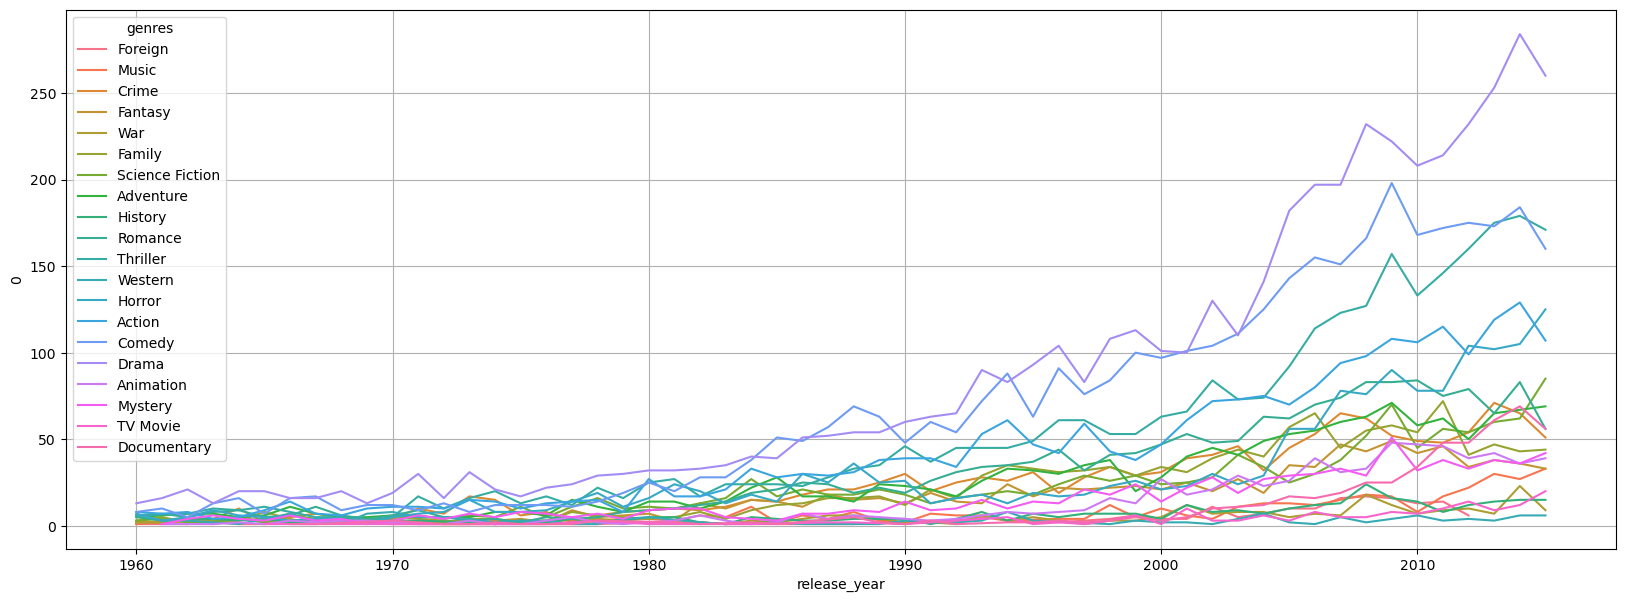

In [18]:
plt.figure(figsize= [20, 7])
sns.lineplot(data= df_gy, x= 'release_year', y= 0, hue= 'genres')
plt.grid();

The above analysis shows that the top 5 most popular genres over the years are Drama, Comedy, Thriller, Action and Romance.

### (Question 2) Genres of movies with the highest budgets

In [19]:
df_2 = df.copy()

In [20]:
# dropping unneeded columns, duplicate rows and null samples.
df_2.drop(['production_companies', 'release_date', 'cast'], axis=1, inplace=True)
df_2.drop_duplicates(inplace=True)
df_2.dropna(inplace=True)

In [21]:
df_2.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
#Top 100 highest budgeted movies. 
df_21 = df_2.query('budget > 1.500000e+08')

In [34]:
# Splitting the genre column
df_21['genres'] = df_21['genres'].str.split('|')
df_21 = df_21.explode('genres')

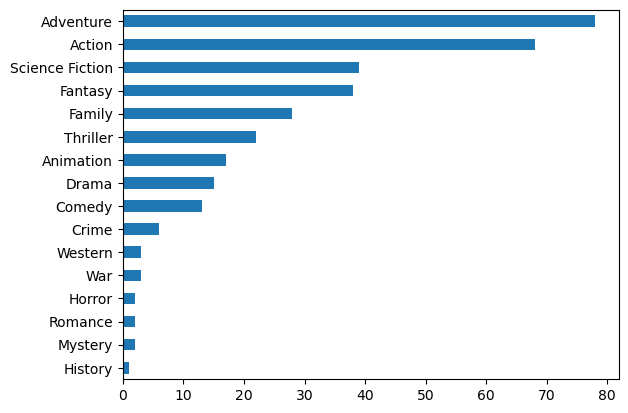

In [24]:
df_21['genres'].value_counts().sort_values().plot.barh();

The above analysis shows that the genres of movies with the highest budgets are adventures, action, Science ficion, fantasy and family. While the genres Romance, Mystery and History have the lowest budgets.

Later in this project, this will be investigated the using scatter plot and correlation function.

### (Question 3) What kinds of properties are associated with movies that have high revenues?

In [25]:
df_3 = df.copy()
df_3.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
# This query returns values of movies with the highest revenues (i.e. revenues higher than the 75th percentile)
df_3.query('revenue > 2.400000e+07').describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2716.000000,2.716000e+03,2.716000e+03,2716.000000,2716.000000,2716.000000,2716.000000,2.716000e+03,2.716000e+03
mean,1.453022,4.537523e+07,1.531700e+08,111.720913,697.190353,6.259094,2001.102356,5.296871e+07,1.955656e+08
std,1.660436,4.629776e+07,1.938363e+08,22.867465,992.000362,0.747895,11.117911,4.856369e+07,2.359930e+08
min,0.010335,0.000000e+00,2.400732e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,2.270964e+07
25%,0.617082,1.400000e+07,4.452597e+07,97.000000,143.000000,5.800000,1995.000000,1.893003e+07,6.173671e+07
50%,1.027213,3.000000e+07,8.622431e+07,108.000000,331.000000,6.300000,2004.000000,3.831525e+07,1.124268e+08
75%,1.690172,6.000000e+07,1.772097e+08,122.000000,805.000000,6.800000,2010.000000,7.441028e+07,2.298801e+08
max,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


In [27]:
# This query returns values of movies with lower revenues (i.e. revenues equal or lower than the 75th percentile)
df_3.query('revenue <= 2.400000e+07').describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8150.000000,8.150000e+03,8.150000e+03,8150.000000,8150.000000,8150.000000,8150.000000,8.150000e+03,8.150000e+03
mean,0.377647,4.378375e+06,2.050352e+06,98.854969,57.495460,5.880221,2001.396074,5.748047e+06,3.309085e+06
std,0.355148,1.182484e+07,5.056093e+06,33.127247,107.762891,0.971447,13.329837,1.503319e+07,9.765166e+06
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.168980,0.000000e+00,0.000000e+00,89.000000,14.000000,5.300000,1994.000000,0.000000e+00,0.000000e+00
50%,0.295841,0.000000e+00,0.000000e+00,96.000000,25.000000,5.900000,2006.000000,0.000000e+00,0.000000e+00
75%,0.477378,2.500000e+06,9.639750e+03,107.000000,54.000000,6.600000,2012.000000,3.349690e+06,9.196652e+03
max,8.411577,4.250000e+08,2.400000e+07,900.000000,2372.000000,9.200000,2015.000000,4.250000e+08,1.343603e+08


In [28]:
# difference between higher revenue movies and lower revenue movies.
df_3.query('revenue > 2.400000e+07')[['budget', 'vote_average']].describe() - df_3.query('revenue <= 2.400000e+07')[['budget', 'vote_average']].describe()

,budget,vote_average
count,-5.434000e+03,-5434.000000
mean,4.099685e+07,0.378873
std,3.447292e+07,-0.223553
min,0.000000e+00,1.900000
25%,1.400000e+07,0.500000
50%,3.000000e+07,0.400000
75%,5.750000e+07,0.200000
max,-4.500000e+07,-0.800000


In the above cells, it can be observed that movies with higher revenues might have higher budgets and higher ratings (vote average) than the lower revenue movies. Note that this shows the summary charasteristics of each individual variable, it is left to show their correlation using scatter plots and correlation method.

In [29]:
# Function to perform bivariate analysis (correlation and scatterplot)

def explore_rel(data, x, y):
    plt.scatter(data[x], data[y])
    plt.title('Correlation between {} and {}'.format(x,y))
    plt.xlabel(x)
    plt.ylabel(y);
    
    print('Value of correlation is: {}'.format(data[x].corr(data[y])))
    

Value of correlation is: 0.734900681907611


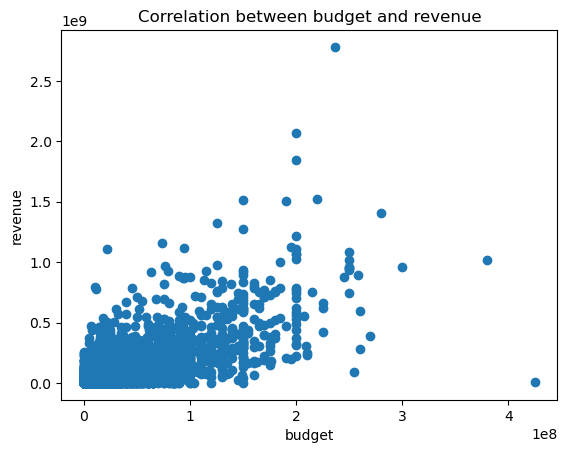

In [30]:
explore_rel(df_3, 'budget', 'revenue')

The graph above suggests that the higher the budget, the higher the revenue.

Value of correlation is: 0.17256374680270065


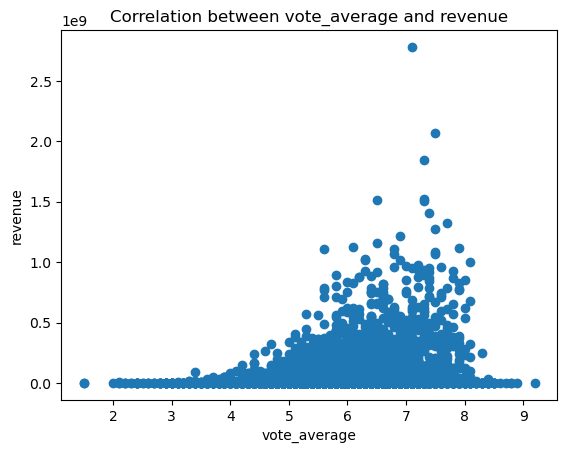

In [31]:
explore_rel(df_3, 'vote_average', 'revenue')

The graph above shows that there is little or no correlation between vote ratings and revenue.

Value of correlation is: 0.6633583664517376


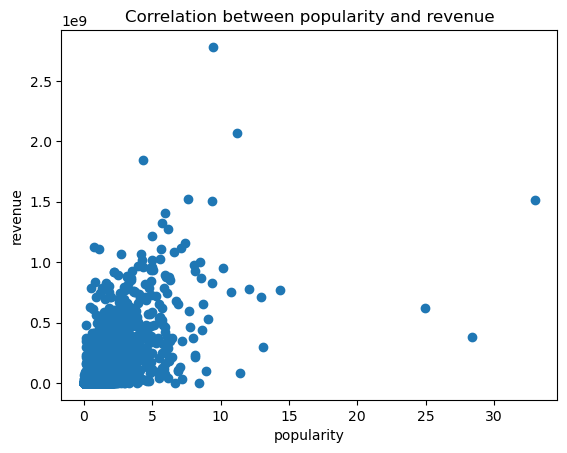

In [32]:
explore_rel(df_3, 'popularity', 'revenue')

The graph above suggests that the higher the revenue, the higher the popularity.

Value of correlation is: 0.16283788998268597


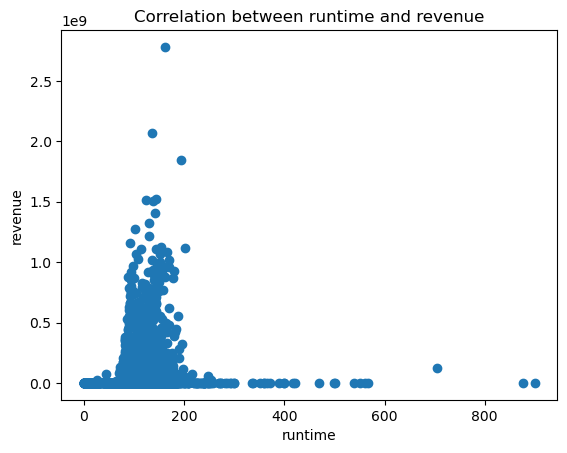

In [33]:
explore_rel(df_3, 'runtime', 'revenue')

The graph above shows that there is little or no correlation between movie runtime and revenue.

<a id='conclusions'></a>
## Conclusions

In the analysis above, the following observations can be made:
- Drama, Comedy, Thriller and Action are the most popular genres over the years. This could mean that a movie has a good chance to gain popularity if it is one of these genres.

- The highest budgeted movie genres are Adventure, Action, Science Fiction, Fantasy and Family. This shows that movies of these genres are more likely to cost more in budgets than other genres.

- For the bivariate analysis, there is a positive correlation between revenue and budget, same with popularity and revenue. Although this does not imply causation between the two variables, it shows that when either popularity or budget is high, revenue is high as well. 

### Limitations

- For the positive correlation observed in the bivariate analysis, more investigations can be carried out to check for causation.

- This is a basic analysis and further statistical analysis and tests can be conducted to validate hypotheses and claims.

### References

- Pandas documentation - (https://pandas.pydata.org/docs/getting_started/index.html)
- Stackoverflow 
- W3schools pandas documentation.